In [105]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm_base, tqdm_notebook as tqdm

tqdm_base.pandas()

In [106]:
# e_northbound_locations.to_hdf('./data/intermed/e_northbound_locations_2018-01.h5', key='e_northbound_locations_gdf', mode='w')
e_northbound_locations_gdf = pd.read_hdf('./data/intermed/e_northbound_locations_2018-01.h5')
e_northbound_locations_gdf.head()

,route_id,trip_id,vehicle_id,coordinates,closest_stop_id
timestamp_utc,,,,,
2017-12-31 23:58:46,102615,34922164,6211,POINT (-122.3445739746094 47.69481658935547),7750
2017-12-31 23:59:04,102615,34922180,6088,POINT (-122.3435592651367 47.61811828613281),6235
2017-12-31 23:59:05,102615,34922131,6054,POINT (-122.3424072265625 47.77417755126953),16103
2017-12-31 23:59:22,102615,34922163,6062,POINT (-122.3457260131836 47.75570297241211),75881
2018-01-01 00:00:08,102615,34922131,6054,POINT (-122.3424072265625 47.77417755126953),16103


In [107]:
e_northbound_locations_gdf['closest_stop_id'].value_counts()

16103    16850
75409     5816
7810      4165
6235      4136
7900      3938
7630      3368
7730      3339
75820     3320
7850      3285
7880      3011
7710      2831
75881     2816
7750      2784
75910     2686
75840     2463
75901     2446
75830     2431
7690      2382
75850     2321
605       2223
7790      2201
75890     2198
75870     2049
75932     2023
7770      2022
75860     2010
578       1853
6320      1738
558       1647
600       1437
538       1240
6300      1231
7912      1228
7670      1052
1610       820
Name: closest_stop_id, dtype: int64

In [108]:
stops_df = pd.read_csv('./data/source/gtfs_20180118/stops.txt')
stop_times_df = pd.read_csv('./data/source/gtfs_20180118/stop_times.txt')

In [109]:
stop_times_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,34654803,04:33:00,04:33:00,99256,1,NaN,0,0,0.0
1,34654803,04:35:00,04:35:00,99260,24,NaN,0,0,4267.8
2,34654803,04:37:00,04:37:00,621,62,NaN,0,0,6562.8
3,34654803,04:39:23,04:39:23,532,79,NaN,0,0,8605.2
4,34654803,04:41:54,04:41:54,565,89,NaN,0,0,10768.1


In [110]:
sums = e_northbound_locations_gdf['closest_stop_id'].value_counts().to_frame()#.rename(columns=['stop_id', 'count'], axis=1)
sums = sums.reset_index().rename(columns={'index': 'stop_id', 'closest_stop_id': 'count'}).set_index('stop_id')

In [111]:
sums

,count
stop_id,
16103,16850
75409,5816
7810,4165
6235,4136
7900,3938
7630,3368
7730,3339
75820,3320
7850,3285


In [112]:
stops_df.set_index('stop_id', inplace=True)

In [113]:
stops_df.head()

,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone
stop_id,,,,,,,,,,
1000,NaN,Pine St & 9th Ave,NaN,47.613415,-122.332138,21,NaN,0,NaN,America/Los_Angeles
10000,NaN,NE 55th St & 43rd Ave NE,NaN,47.668575,-122.283653,1,NaN,0,NaN,America/Los_Angeles
10005,NaN,40th Ave NE & NE 51st St,NaN,47.665886,-122.284897,1,NaN,0,NaN,America/Los_Angeles
10010,NaN,NE 55th St & 39th Ave NE,NaN,47.668579,-122.285667,1,NaN,0,NaN,America/Los_Angeles
10020,NaN,NE 55th St & 37th Ave NE,NaN,47.668579,-122.288300,1,NaN,0,NaN,America/Los_Angeles


In [114]:
pd.DataFrame(sums).join(stops_df)

,count,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone
stop_id,,,,,,,,,,,
16103,16850,NaN,Aurora Village Transit Center - Bay 3,NaN,47.774483,-122.340881,18,NaN,0,NaN,America/Los_Angeles
75409,5816,NaN,Aurora Ave N & N 46th St,NaN,47.661686,-122.347160,1,NaN,0,NaN,America/Los_Angeles
7810,4165,NaN,Aurora Ave N & N Northgate Way,NaN,47.705353,-122.344597,1,NaN,0,NaN,America/Los_Angeles
6235,4136,NaN,Aurora Ave N & Denny Way,NaN,47.618088,-122.343460,1,NaN,0,NaN,America/Los_Angeles
7900,3938,NaN,Aurora Ave N & N 130th St,NaN,47.723461,-122.344879,1,NaN,0,NaN,America/Los_Angeles
7630,3368,NaN,Woodland Pl N & N 65th St,NaN,47.676334,-122.346985,1,NaN,0,NaN,America/Los_Angeles
7730,3339,NaN,Aurora Ave N & N 85th St,NaN,47.690895,-122.344429,1,NaN,0,NaN,America/Los_Angeles
75820,3320,NaN,Aurora Ave N & N 145th St,NaN,47.734924,-122.345016,20,NaN,0,NaN,America/Los_Angeles
7850,3285,NaN,Aurora Ave N & N 115th St,NaN,47.712723,-122.344719,1,NaN,0,NaN,America/Los_Angeles


In [115]:
# stop_ids = denny=6235, 46th=75409

In [116]:
segment_gdf = e_northbound_locations_gdf[e_northbound_locations_gdf.closest_stop_id.isin([6235, 75409])]
segment_gdf

,route_id,trip_id,vehicle_id,coordinates,closest_stop_id
timestamp_utc,,,,,
2017-12-31 23:59:04,102615,34922180,6088,POINT (-122.3435592651367 47.61811828613281),6235
2018-01-01 00:05:05,102615,34922180,6088,POINT (-122.3472671508789 47.66167068481445),75409
2018-01-01 00:05:47,102615,34922180,6088,POINT (-122.3472290039062 47.66503524780274),75409
2018-01-01 00:15:24,102615,34922132,6041,POINT (-122.3435592651367 47.61762237548828),6235
2018-01-01 00:21:23,102615,34922132,6041,POINT (-122.3472671508789 47.66162490844727),75409
2018-01-01 00:22:08,102615,34922132,6041,POINT (-122.3472290039062 47.66537475585938),75409
2018-01-01 00:36:08,102615,34922153,6209,POINT (-122.3472442626953 47.65713119506836),75409
2018-01-01 00:37:45,102615,34922153,6209,POINT (-122.3472366333008 47.66466522216797),75409
2018-01-01 00:40:25,102615,34922133,6207,POINT (-122.3435592651367 47.61809158325195),6235


In [117]:
# create df trip_id, denny_timestamp, 46th_timestamp, delta

In [119]:
def collapse_rows(df):
    last_times = df.groupby('closest_stop_id').last()
    return pd.Series({
        'from': last_times.timestamp_utc.get(6235),
        'to': last_times.timestamp_utc.get(75409)
    })

grouped = segment_gdf.reset_index().groupby(['trip_id', 'vehicle_id'])
collapsed = grouped.apply(collapse_rows)

In [120]:
collapsed['from'] = collapsed['from'].apply(pd.to_datetime)
collapsed['to'] = collapsed['to'].apply(pd.to_datetime)
collapsed['timedelta'] = collapsed.apply(lambda x: x['to'] - x['from'], axis=1)
collapsed = collapsed.dropna(subset=['timedelta'])
collapsed = collapsed.reset_index().set_index('from')

In [121]:
# because df.hist() won't work on our datetime col
collapsed['timedelta_mins'] = collapsed['timedelta'].apply(lambda x: x / pd.Timedelta('1 minute'))

In [122]:
# because our assumption that a vehicle wouldn't luck its way into duplicate trip_id in 
# monthly period, we have some bad data to filter out
# a more robust index above (vs vehicle_id + trip_id) would be to create a sliding window
# and generate a vehicle_trip_id for trips grouped over a 24 hour window

In [123]:
collapsed = collapsed[collapsed.timedelta_mins > 0]
collapsed = collapsed[collapsed.timedelta_mins < 720] # reasonable that between these two points, 12 hours should never happen

In [124]:
collapsed.shape

(2272, 5)

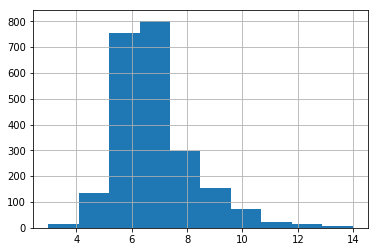

In [125]:
# histogram for *all* e trips on aurora between denny and 46th
collapsed['timedelta_mins'].hist()

In [126]:
# add weekday and hour cols so we can generate histograms for things like weekday rush-hour
# mon = 0, sun = 6
collapsed['weekday'] = collapsed.index.weekday
collapsed['hour'] = (collapsed.index.hour - 8) % 24 # because index is in utc

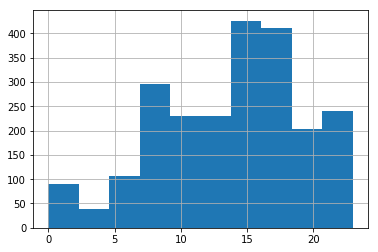

In [130]:
# verify our timezone shift is correct, we should see majority of activity in afternoon
collapsed['hour'].hist()

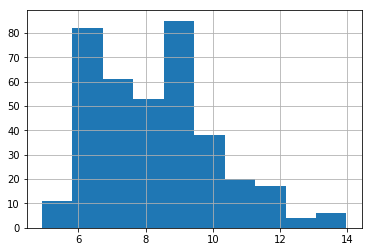

In [132]:
# plot of weekday rush-hour (4pm-7pm) between denny/aurora
weekday = collapsed[(collapsed.weekday < 6) & (collapsed.hour > 16) & (collapsed.hour < 19)]
weekday['timedelta_mins'].hist()